In [17]:
!pip uninstall -y pandas
!pip install --upgrade --no-cache-dir pandas
!pip uninstall -y xgboost
!pip install --upgrade --no-cache-dir xgboost

Found existing installation: pandas 1.0.4
Uninstalling pandas-1.0.4:
  Successfully uninstalled pandas-1.0.4
     |████████████████████████████████| 10.1 MB 1.8 MB/s eta 0:00:01
Found existing installation: xgboost 1.1.0
Uninstalling xgboost-1.1.0:
  Successfully uninstalled xgboost-1.1.0
     |████████████████████████████████| 127.6 MB 35.9 MB/s eta 0:00:01    |██████████████████▉             | 75.0 MB 34.4 MB/s eta 0:00:02     |█████████████████████           | 83.4 MB 39.6 MB/s eta 0:00:02     |████████████████████████████▋   | 114.0 MB 39.6 MB/s eta 0:00:01     |█████████████████████████████▋  | 118.1 MB 39.6 MB/s eta 0:00:01


In [98]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11684 sha256=dcef4a0ab4cc750dbe11a6021f6ee837e463ec2f40c9bac41370268a829315f6
  Stored in directory: /home/jovyan/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import pickle
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

In [146]:
data = pickle.load(open('./fullxy_5day.pkl',mode='rb'))

In [147]:
x = data[0]
y = data[1] > 0
y = y.astype('int')
np.unique(y)

array([0, 1])

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.3,random_state=42)

In [34]:
reg = LinearRegression().fit(x,y)

In [35]:
reg.score(x,y)

0.02798394743942023

In [9]:
reg.coef_

array([-2.75101377e-01,  3.28526864e+00,  3.45454149e-03,  6.62128615e-03,
       -7.75229603e-01,  4.85551892e-01, -1.67185057e-02,  1.52070684e-02,
       -1.43234625e+00,  1.73015437e+00,  2.09527542e-02, -9.25775704e-03,
       -4.81056500e-02, -6.69462977e-01, -1.65364086e-02, -7.12809441e-03,
       -7.58221179e-01, -4.71157239e-01,  2.50348824e-02, -1.35946968e-02,
        1.00006590e+00, -1.91676014e+00, -3.40500037e-02,  9.70458505e-03,
       -1.03099420e+00, -9.11349129e-01,  2.43385508e-02, -8.25267847e-03,
       -6.12321823e-01, -1.97373520e-01,  8.10950945e-04, -1.45939214e-02,
       -1.97668403e-01, -1.09183287e+00,  8.87998709e-03, -1.73087271e-02,
       -6.37259309e-01, -1.83970641e+00, -5.02815136e-03, -7.64326014e-03,
        1.78589279e-02, -1.62658648e+00,  5.04735472e-03, -2.60065493e-03,
       -8.52174469e-02,  7.07914446e+00,  4.75405035e-03, -4.67092712e-03])

In [64]:
clf = tree.DecisionTreeRegressor().fit(X_train,y_train)

In [37]:
sum((y_test-clf.predict(X_test))**2)

14368.006944444447

In [38]:
sum((y_train-clf.predict(X_train))**2)

6216.083333333333

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [8]:
booly = y>0

In [9]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, x, booly, cv=5)

In [10]:
scores

array([0.64435946, 0.61567878, 0.61626794, 0.6277512 , 0.58660287])

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y,reg.predict(x))

0.017152989079105674

In [46]:
clf

AdaBoostClassifier(n_estimators=100)

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
logreg = LogisticRegression(max_iter=200, l1_ratio = 0.5, solver='saga',penalty="elasticnet")

In [150]:
logreg.fit(X=X_train,y=y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(l1_ratio=0.5, max_iter=200, penalty='elasticnet',
                   solver='saga')

In [151]:
logreg.score(X_test,y_test)

0.5255930087390761

In [57]:
y

array([5, 1, 1, ..., 0, 0, 0], dtype=object)

In [58]:
X_train.shape

(4212, 48)

In [77]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [96]:
eval_set =[(X_test, y_test)]
xg = xgb.XGBClassifier(colsample_bytree=0.95,
                       subsample = 0.95,
                       n_estimators = 2000, 
                       max_depth=3,
                       learning_rate = 0.05)
xg.fit(X_train,y_train, eval_metric="error", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.95, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
eval_set =[(X_test, y_test)]
xg = xgb.XGBClassifier(**fix_params)
xg.fit(X_train,y_train, eval_metric="error", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              gamma=0.006525503828750057, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0880582524454897,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1888, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [141]:
y_pred = xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy %.2f%%' % (accuracy*100.0))
y_post = xg.predict(X_train)
accuracy = accuracy_score(y_train, y_post)
print(f'Train accuracy %.2f%%' % (accuracy*100.0))

Test accuracy 66.10%
Train accuracy 100.00%


In [142]:
y_post = xg.predict(X_train)
accuracy = accuracy_score(y_train, y_post)
print(accuracy)

1.0


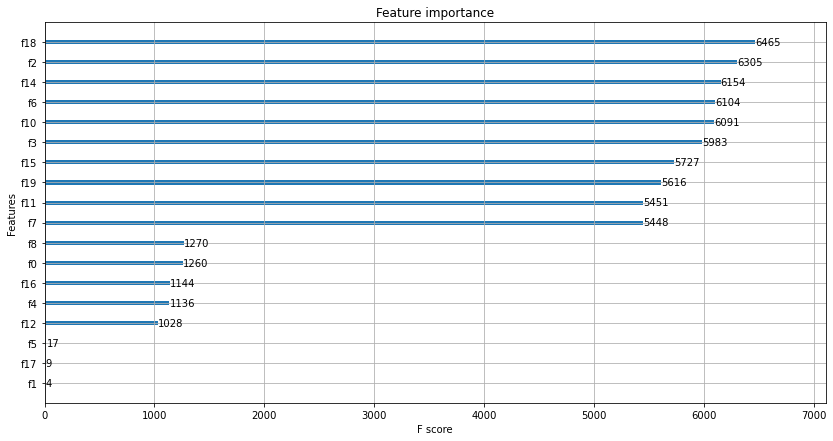

In [143]:
plt.rcParams["figure.figsize"] = (14, 7)
fig = xgb.plot_importance(xg)

In [136]:
#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
    cv_result = xgb.cv(params,dtrain, num_boost_round=70, nfold=5)
    #Return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [137]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [138]:
#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 15),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(15,4200)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=15, init_points=70, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
[21:39:54] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:54] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:54] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in lang

In [139]:
keep_params = xgb_bo.max['params']
fix_params = keep_params
fix_params['max_depth'] = round(fix_params['max_depth']).astype(int)
fix_params['n_estimators'] = round(fix_params['n_estimators']).astype(int)
fix_params

{'gamma': 0.006525503828750057,
 'learning_rate': 0.0880582524454897,
 'max_depth': 10,
 'n_estimators': 1888}

In [144]:
pickle.dump(xg,open("xgmodel_MVP.pkl",mode='wb'))